In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import pickle
import nltk.corpus
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

from sklearn.utils import shuffle

In [ ]:
train_1=pd.read_csv("/content/drive/MyDrive/Minor Project 2/toxic_train.csv")
train_1.drop(['Unnamed: 0'],axis='columns',inplace=True)
train_1 = train_1.rename(columns={'toxic': 'label','comment_text':'tweet'})

In [ ]:
train_1.tail()

,tweet,label
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \r\n\r\nThat...,0
159568,"Spitzer \r\n\r\nUmm, theres no actual article ...",0
159569,And it looks like it was actually you who put ...,0
159570,"""\r\nAnd ... I really don't think you understa...",0


In [ ]:
#balance = pd.read_csv("/content/drive/MyDrive/Minor Project 2/labeled_data.csv")

In [ ]:
#balance['label'] = 1

In [ ]:
#balance = pd.DataFrame(balance[['label',"tweet"]])

In [ ]:
#balance.head()

In [ ]:
#train = [train_1, balance]
#train = pd.concat(train)

In [ ]:
train = shuffle(train_1)
train = train.reset_index(drop=True)

In [ ]:
train.head()

,tweet,label
0,I just thought it would take more than seven d...,0
1,"""\r\n Proposed deletion of Vitaly Rudakovskiy ...",0
2,Toy soldiers? That made NO sense but okay budd...,0
3,"""\r\n\r\nSlash & Friends label\r\nAccording to...",0
4,Sacred Name Movement Vandalism \r\n\r\nLast ye...,0


In [ ]:
train.tail()

,tweet,label
159566,And the fact of the matter is as simple as cri...,0
159567,"""\r\nReally ? How about\r\n\r\nSourcing should...",0
159568,"""And about Metzenberger and Homo SApiens, were...",0
159569,I'm certain Mr. Garrison would agree 100%,0
159570,If you check http://en.wikipedia.org/wiki/CeCe...,0


([<matplotlib.patches.Wedge at 0x7f0dc8495ed0>,
 [Text(-1.0505104875484585, 0.32623260957589806, 'positive'),
  Text(1.0505104646403798, -0.32623268334281524, 'negative')])

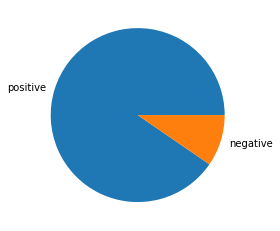

In [ ]:
plt.pie(labels=['positive','negative'],x=train['label'].value_counts())

<BarContainer object of 2 artists>

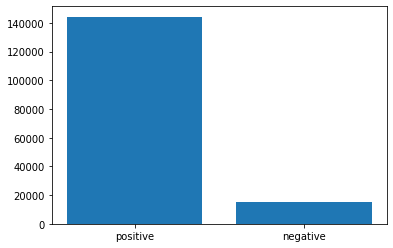

In [ ]:
plt.bar(['positive','negative'],train['label'].value_counts())

In [ ]:
train.head(5)

,tweet,label
0,I just thought it would take more than seven d...,0
1,"""\r\n Proposed deletion of Vitaly Rudakovskiy ...",0
2,Toy soldiers? That made NO sense but okay budd...,0
3,"""\r\n\r\nSlash & Friends label\r\nAccording to...",0
4,Sacred Name Movement Vandalism \r\n\r\nLast ye...,0


In [ ]:
train.columns

Index(['tweet', 'label'], dtype='object')

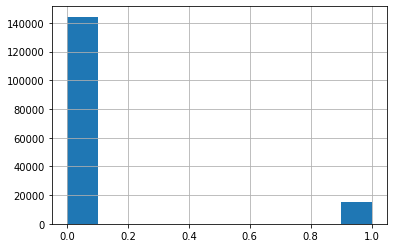

In [ ]:
train['label'].hist()

In [ ]:
train['label'].value_counts()

0    144277
1     15294
Name: label, dtype: int64

In [ ]:
temp = train[train['label']==1]

In [ ]:
train = [train, temp]
train = pd.concat(train)
train = shuffle(train)
train = train.reset_index(drop=True)

In [ ]:
train['label'].value_counts()

0    144277
1     30588
Name: label, dtype: int64

In [ ]:
train.head()

,tweet,label
0,Wikipedia:Manual of Style (capital letters)#Mi...,0
1,{{unblock}}LIFETIME BAN LIFETIME BAN I WANTA F...,1
2,"Welcome!\r\n\r\nHello, Bdispenza, and welcome ...",0
3,Provide professional critics' reviews,0
4,"""\r\n\r\nProblem\r\n\r\nThis guy: http://en.wi...",0


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Storing stopwords of english language from nltk library
sw = set(stopwords.words("english"))

# remove stop words
def filter_words(word_list):
    useful_words = [ w for w in word_list if w not in sw ]
    return(useful_words)

def preprocess_data(dataset):
    data = dataset.copy()
    t = []
    for i in data['tweet']:
        sentence = str(i)
        sentence = sentence.lower()
        sentence = re.sub(r'@\w+ | http | #\w+', '', sentence)
        t.append(sentence)

    data['cleaned'] = t
    #Removing punctuations, special characters and lemmatizing words to their base form
    data['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in data['cleaned']]
    
    a=[]
    for text in data['text_lem']:
        word_list = word_tokenize(text)
        text=filter_words(word_list)
        a.append(text)  
    
    train_text = []
    for i in a:
      train_text.append(' '.join(i))

    data['cleaned_tweets'] = train_text
    return data

In [ ]:
temp = preprocess_data(train)

In [ ]:
temp[temp['cleaned_tweets'].str.split().str.len()<2]['label'].value_counts()

0    791
1    130
Name: label, dtype: int64

In [ ]:
temp[temp['cleaned_tweets'].str.split().str.len()>40]['label'].value_counts()

0    34891
1     4102
Name: label, dtype: int64

In [ ]:
temp['label'].value_counts()

0    144277
1     30588
Name: label, dtype: int64

In [ ]:
temp.shape

(174865, 5)

In [ ]:
temp = temp[temp['cleaned_tweets'].str.split().str.len()>=2]
temp = temp[temp['cleaned_tweets'].str.split().str.len()<=40]

In [ ]:
temp.shape

(134951, 5)

In [ ]:
temp['label'].value_counts()

0    108595
1     26356
Name: label, dtype: int64

In [ ]:
temp.head()

,tweet,label,cleaned,text_lem,cleaned_tweets
0,Wikipedia:Manual of Style (capital letters)#Mi...,0,wikipedia:manual of style (capital letters)#mi...,wikipedia manual of style capital letters mi...,wikipedia manual style capital letters militar...
3,Provide professional critics' reviews,0,provide professional critics' reviews,provide professional critics reviews,provide professional critics reviews
4,"""\r\n\r\nProblem\r\n\r\nThis guy: http://en.wi...",0,"""\r\n\r\nproblem\r\n\r\nthis guy: http://en.wi...",problem this guy http en wikipedia ...,problem guy http en wikipedia org wiki user al...
6,"if i remember right, this band went through at...",0,"if i remember right, this band went through at...",if i remember right this band went through at...,remember right band went least two singers
8,"""\r\nThere is no hard minimum for the userrigh...",0,"""\r\nthere is no hard minimum for the userrigh...",there is no hard minimum for the userright ...,hard minimum userright users generally must ex...


In [ ]:
temp.shape

(134951, 5)

In [ ]:
x_train = temp['cleaned_tweets'].values
y_train = temp['label'].values

In [ ]:
x_train.shape

(134951,)

In [ ]:
y_train.shape

(134951,)

In [ ]:
total_words = []

for key in x_train:
    [total_words.append(i) for i in key.split()]
print("total Words %d"%len(total_words))

total Words 2052084


In [ ]:
freq = {}
for i in total_words:
    if freq.get(i) is None:
        freq[i] = 0
    freq[i]+=1

In [ ]:
len(freq)

94935

In [ ]:
sorted_frq_cnt = sorted(freq.items(),reverse=True,key = lambda x:x[1]) #we have to use lambda as if wont use it will sort accoding with words

threshold = 10  #it is not fixed i have choosen to take 10 as if in 16,79,076 that word is coming only 10 times then it doesn't make any difference
sorted_frq_cnt = [x for x in sorted_frq_cnt if x[1] > threshold]
total_words = [x[0] for x in sorted_frq_cnt]

In [ ]:
print(len(total_words))

12848


In [ ]:
print(x_train.shape)
print(y_train.shape)

(134951,)
(134951,)


In [ ]:
max_len = 0
skip = 0
for i,cap in enumerate(x_train):
    max_len = max(max_len,len(cap.split()))
    if(len(cap.split()) >40):
        skip += 1
print(max_len)
print(skip)

40
0


In [ ]:
x_train_c = []
y_train_c = []
max_len = 0
skip = 0
for i,cap in enumerate(x_train):
    max_len = max(max_len,len(cap.split()))
    if(len(cap.split()) <=40):
      x_train_c.append(cap)
      y_train_c.append(y_train[i])
      skip += 1
print(max_len)
print(skip)
x_train_c = np.array(x_train_c)
y_train_c = np.array(y_train_c)

40
134951


In [ ]:
print(x_train_c.shape)
print(y_train_c.shape)


(134951,)
(134951,)


In [ ]:
np.unique(y_train_c,return_counts=True)

(array([0, 1]), array([108595,  26356]))

In [ ]:
max_len = 0
skip = 0
for i,cap in enumerate(x_train_c):
    max_len = max(max_len,len(cap.split()))
    if(len(cap.split()) > 40):
        skip+=1
print(max_len)
print(skip)

40
0


In [ ]:
print(len(x_train_c))
print(len(y_train_c))

134951
134951


In [ ]:
len(total_words)

12848

In [ ]:
word_to_idx = {}
idx_to_word = {}

for i,word in enumerate(total_words):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word

In [ ]:
print(len(idx_to_word))
print(len(word_to_idx))

12848
12848


In [ ]:
idx_to_word[12848]

'prasad'

In [ ]:
vocab_size = len(word_to_idx) + 1
print("vocab size",vocab_size)

vocab size 12849


In [ ]:
with open("/content/drive/MyDrive/Minor Project 2/data files4/word_to_idx.pkl","wb") as w2i:
    pickle.dump(word_to_idx,w2i)
with open("/content/drive/MyDrive/Minor Project 2/data files4/idx_to_word.pkl","wb") as i2w:
    pickle.dump(idx_to_word,i2w)
with open("/content/drive/MyDrive/Minor Project 2/data files4/x_train.pkl","wb") as des:
    pickle.dump(x_train_c,des)
with open("/content/drive/MyDrive/Minor Project 2/data files4/y_train.pkl","wb") as tedes:
    pickle.dump(y_train_c,tedes)